<a href="https://colab.research.google.com/github/RMoulla/IAA/blob/main/TP_IAG_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Travaux pratiques : génération de code pour l'entraînement d'un modèle de machine learning**

In [ ]:
import pandas as pd

df = pd.read_csv('customer_churn.csv')
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


## **Analyse exploratoire des données**

<Axes: xlabel='Churn', ylabel='count'>

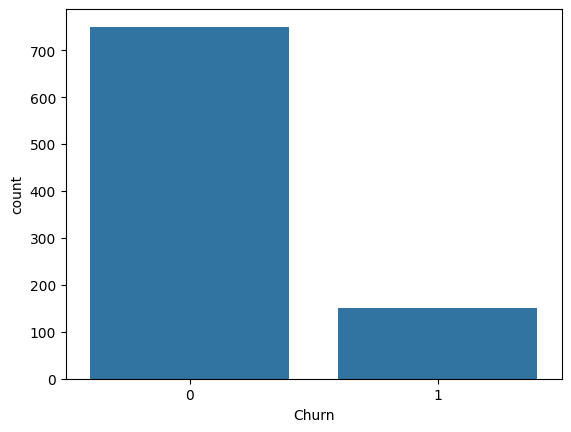

In [ ]:
# Visualiser la variable churn avec seaborn
import seaborn as sns
sns.countplot(x='Churn', data=df)

<Axes: xlabel='Churn', ylabel='Age'>

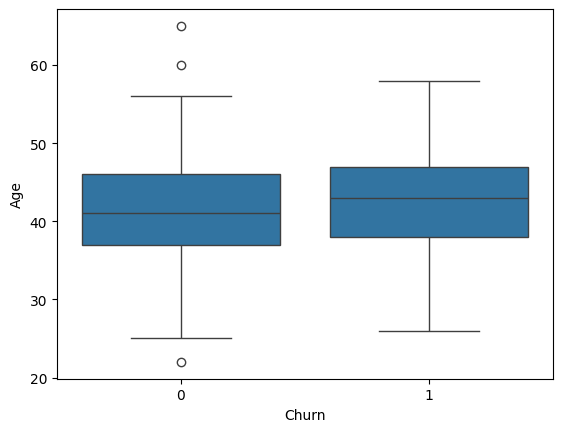

In [ ]:
# Visualiser le churn en fonction de l'âge avec une boxplot
sns.boxplot(x='Churn', y='Age', data=df)

<Axes: xlabel='Churn', ylabel='Total_Purchase'>

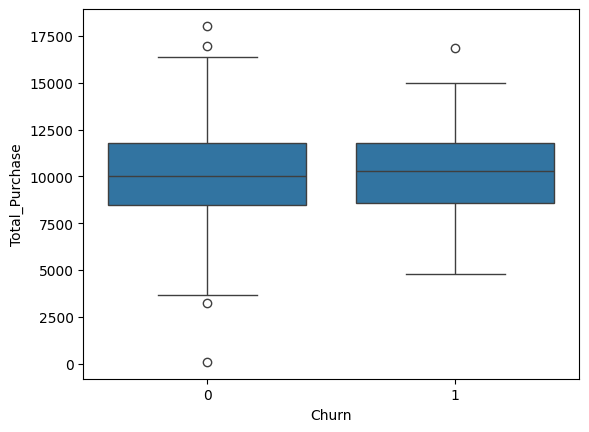

In [ ]:
# Visualiser le churn en fonction de total_purchase
sns.boxplot(x='Churn', y='Total_Purchase', data=df)

<Axes: xlabel='Churn', ylabel='Num_Sites'>

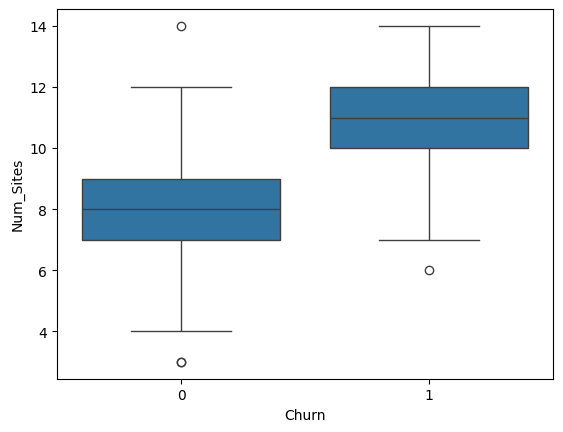

In [ ]:
# Visualiser le churn en fonction de num_sites
sns.boxplot(x='Churn', y='Num_Sites', data=df)

<Axes: xlabel='Churn', ylabel='count'>

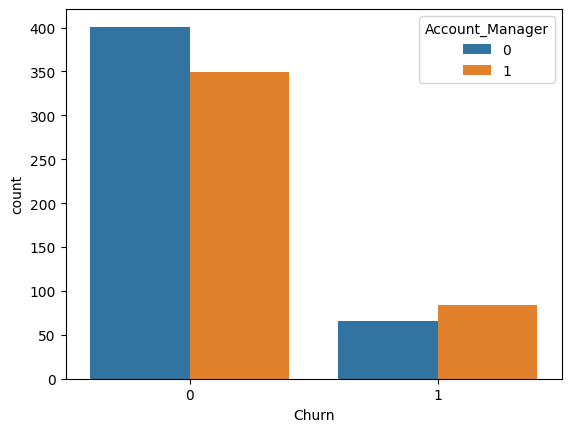

In [ ]:
# Visualiser le churn en fonction de Account_Manager
sns.countplot(x='Churn', hue='Account_Manager', data=df)

## **Modélisation**

In [ ]:
# Isoler les X et les y
X = df[['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites']]
y = df['Churn']

In [ ]:
# Splitter en train et test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Entraîne un modèle de régression logistique avec statsmodels avec une constante
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
log_reg = sm.Logit(y_train, X_train_const).fit()

# Afficher le résumé du modèle
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.248470
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                  630
Model:                          Logit   Df Residuals:                      624
Method:                           MLE   Df Model:                            5
Date:                Thu, 02 Oct 2025   Pseudo R-squ.:                  0.4422
Time:                        14:51:31   Log-Likelihood:                -156.54
converged:                       True   LL-Null:                       -280.61
Covariance Type:            nonrobust   LLR p-value:                 1.370e-51
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.4502      2.057     -9.456      0.000     -23.482     -15.419
Age           